In [1]:
import numpy as np
import pandas as pd
import os
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization,LeakyReLU
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.models import Model,Sequential
from pathlib import Path

In [2]:
image_dir=Path('Train')

In [3]:
data_set=pd.read_csv("Train/train.csv")
data_set["Class"].unique()
data_set.head(200)

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
...,...,...
195,11785.jpg,MIDDLE
196,12973.jpg,MIDDLE
197,6191.jpg,MIDDLE
198,17739.jpg,MIDDLE


(array([0, 1, 2]),
 [Text(0, 0, 'MIDDLE'), Text(1, 0, 'YOUNG'), Text(2, 0, 'OLD')])

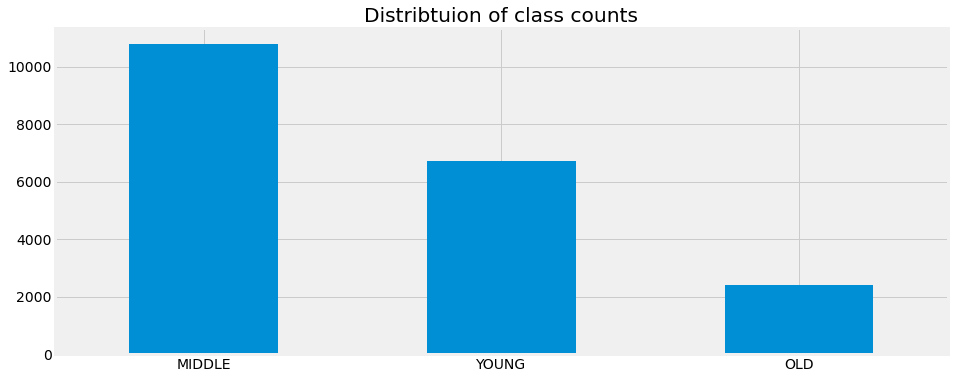

In [4]:
plt.figure(figsize = (16,6))
plt.style.use("fivethirtyeight")
data_set['Class'].value_counts().plot(kind = 'bar',grid = True)
plt.title("Distribtuion of class counts")
plt.xticks(rotation = 0)

In [5]:
image_dir_1=Path('CNN_Age')
filepaths_1=pd.Series(list(image_dir_1.glob(r'**/*.jpg')),name='Filepath').astype(str)
ages=pd.Series(filepaths_1.apply(lambda x: os.path.split(os.path.split(x)[0])[1]), name='Age').astype(str)
images=pd.concat([filepaths_1,ages],axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)
images

,Filepath,Age
0,CNN_Age\MIDDLE\5930.jpg,MIDDLE
1,CNN_Age\MIDDLE\6559.jpg,MIDDLE
2,CNN_Age\MIDDLE\2095.jpg,MIDDLE
3,CNN_Age\MIDDLE\16120.jpg,MIDDLE
4,CNN_Age\MIDDLE\10016.jpg,MIDDLE
...,...,...
19901,CNN_Age\OLD\11547.jpg,OLD
19902,CNN_Age\YOUNG\24356.jpg,YOUNG
19903,CNN_Age\MIDDLE\21631.jpg,MIDDLE
19904,CNN_Age\OLD\23793.jpg,OLD


In [6]:
a_images=images.sample(10000,random_state=1).reset_index(drop=True)
a_images

,Filepath,Age
0,CNN_Age\MIDDLE\14202.jpg,MIDDLE
1,CNN_Age\MIDDLE\22940.jpg,MIDDLE
2,CNN_Age\OLD\20985.jpg,OLD
3,CNN_Age\YOUNG\23614.jpg,YOUNG
4,CNN_Age\MIDDLE\10016.jpg,MIDDLE
...,...,...
9995,CNN_Age\MIDDLE\2542.jpg,MIDDLE
9996,CNN_Age\OLD\21287.jpg,OLD
9997,CNN_Age\YOUNG\26243.jpg,YOUNG
9998,CNN_Age\MIDDLE\12933.jpg,MIDDLE


In [7]:
train_set,test_set=train_test_split(a_images,train_size=0.8,shuffle=True,random_state=1)
validation_set,test_set = train_test_split(test_set,train_size=0.5,shuffle=True,random_state=1)


In [8]:
train_set


,Filepath,Age
2694,CNN_Age\MIDDLE\2894.jpg,MIDDLE
5140,CNN_Age\YOUNG\18528.jpg,YOUNG
2568,CNN_Age\YOUNG\13372.jpg,YOUNG
3671,CNN_Age\MIDDLE\3813.jpg,MIDDLE
7427,CNN_Age\YOUNG\9701.jpg,YOUNG
...,...,...
2895,CNN_Age\YOUNG\5596.jpg,YOUNG
7813,CNN_Age\MIDDLE\10468.jpg,MIDDLE
905,CNN_Age\YOUNG\11033.jpg,YOUNG
5192,CNN_Age\MIDDLE\14657.jpg,MIDDLE


In [9]:
test_set

,Filepath,Age
82,CNN_Age\MIDDLE\6418.jpg,MIDDLE
7895,CNN_Age\OLD\7589.jpg,OLD
9458,CNN_Age\MIDDLE\24451.jpg,MIDDLE
2560,CNN_Age\YOUNG\7634.jpg,YOUNG
6802,CNN_Age\OLD\5866.jpg,OLD
...,...,...
6849,CNN_Age\MIDDLE\4689.jpg,MIDDLE
9984,CNN_Age\MIDDLE\14396.jpg,MIDDLE
6603,CNN_Age\MIDDLE\10176.jpg,MIDDLE
659,CNN_Age\MIDDLE\17070.jpg,MIDDLE


In [10]:
validation_set

,Filepath,Age
8418,CNN_Age\MIDDLE\11969.jpg,MIDDLE
4613,CNN_Age\MIDDLE\7684.jpg,MIDDLE
6683,CNN_Age\OLD\16896.jpg,OLD
8315,CNN_Age\MIDDLE\9844.jpg,MIDDLE
9470,CNN_Age\OLD\1357.jpg,OLD
...,...,...
1915,CNN_Age\YOUNG\13755.jpg,YOUNG
5938,CNN_Age\MIDDLE\10708.jpg,MIDDLE
8887,CNN_Age\MIDDLE\922.jpg,MIDDLE
3632,CNN_Age\MIDDLE\18235.jpg,MIDDLE


In [11]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)

In [12]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_set,  
    x_col='Filepath',
    y_col='Age',
    target_size=(64, 64),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,

)
validation_images = test_generator.flow_from_dataframe(
    dataframe=validation_set,   
    x_col='Filepath',
    y_col='Age',
    target_size=(64, 64),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_set,   
    x_col='Filepath',
    y_col='Age',
    target_size=(64, 64),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
)
print(len(train_images))
print(len(validation_images))
print(len(test_images))

Found 8000 validated image filenames belonging to 3 classes.
Found 1000 validated image filenames belonging to 3 classes.
Found 1000 validated image filenames belonging to 3 classes.
125
16
16


In [13]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(64,64,3),padding='same'))
model.add(Conv2D(32, kernel_size=(3, 3),padding='same'))
model.add(BatchNormalization())

model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))

model.add(Dropout(0.4))

model.add(Conv2D(16, kernel_size=(3, 3),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.3))


model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(64))

model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

his=model.fit(train_images,
                         steps_per_epoch = len(train_images),
                         epochs = 25,
                         validation_data = validation_images,
                         validation_steps = len(validation_images),
                         verbose=1)

Epoch 1/25
125/125 [==============================] - 70s 552ms/step - loss: 1.2591 - accuracy: 0.5414 - val_loss: 1.2993 - val_accuracy: 0.2530
Epoch 2/25
125/125 [==============================] - 68s 547ms/step - loss: 0.9418 - accuracy: 0.5776 - val_loss: 1.3040 - val_accuracy: 0.3630
Epoch 3/25
125/125 [==============================] - 65s 518ms/step - loss: 0.8790 - accuracy: 0.6081 - val_loss: 1.3078 - val_accuracy: 0.4330
Epoch 4/25
125/125 [==============================] - 63s 504ms/step - loss: 0.8422 - accuracy: 0.6205 - val_loss: 0.8536 - val_accuracy: 0.6030
Epoch 5/25
125/125 [==============================] - 63s 506ms/step - loss: 0.8172 - accuracy: 0.6403 - val_loss: 1.9035 - val_accuracy: 0.4170
Epoch 6/25
125/125 [==============================] - 63s 504ms/step - loss: 0.7926 - accuracy: 0.6496 - val_loss: 0.8434 - val_accuracy: 0.6360
Epoch 7/25
125/125 [==============================] - 64s 508ms/step - loss: 0.7811 - accuracy: 0.6562 - val_loss: 0.8164 - val_ac

In [14]:
score = model.evaluate(test_images, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 1s 76ms/step - loss: 0.7455 - accuracy: 0.6630
Test score: 0.7455118894577026
Test accuracy: 0.6629999876022339


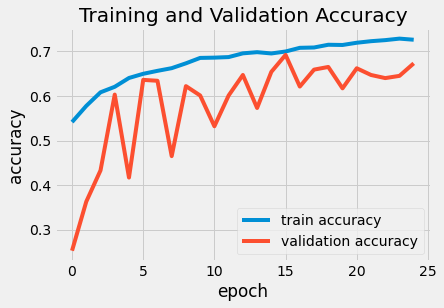

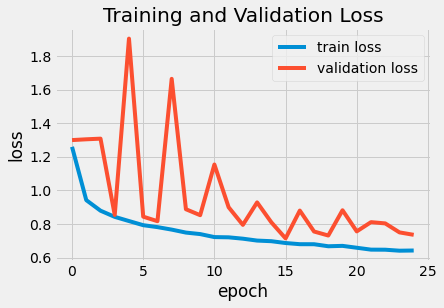

In [15]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()


plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()

In [ ]:
model_3 = Sequential()

model_3.add(Flatten())
model_3.add(Dense(64, activation = "relu", input_shape=(64,64,3)))
model_3.add(Dropout(0.3))


model_3.add(Dense(32,activation = "relu"))
model_3.add(Dropout(0.3))

model_3.add(Dense(16,activation = "relu"))
model_3.add(Dropout(0.3))

model_3.add(Dense(8,activation = "relu"))
model_3.add(Dropout(0.3))

# model_3.add(Flatten())
model_3.add(Dense(3,activation = "relu"))


model_3.compile(optimizer = 'adam' , loss ="categorical_crossentropy",metrics = ['accuracy'])

his1=model_3.fit(train_images,
                         steps_per_epoch = len(train_images),
                         epochs = 25,
                         validation_data = validation_images,
                         validation_steps = len(validation_images),
                       
                         verbose=1)

Epoch 1/25
125/125 [==============================] - 32s 245ms/step - loss: nan - accuracy: 0.5424 - val_loss: nan - val_accuracy: 0.5300
Epoch 2/25
125/125 [==============================] - 16s 124ms/step - loss: nan - accuracy: 0.5437 - val_loss: nan - val_accuracy: 0.5300
Epoch 3/25
125/125 [==============================] - 13s 107ms/step - loss: nan - accuracy: 0.5437 - val_loss: nan - val_accuracy: 0.5300
Epoch 4/25
125/125 [==============================] - 14s 109ms/step - loss: nan - accuracy: 0.5437 - val_loss: nan - val_accuracy: 0.5300
Epoch 5/25
125/125 [==============================] - 13s 105ms/step - loss: nan - accuracy: 0.5437 - val_loss: nan - val_accuracy: 0.5300
Epoch 6/25
125/125 [==============================] - 13s 105ms/step - loss: nan - accuracy: 0.5437 - val_loss: nan - val_accuracy: 0.5300
Epoch 7/25
125/125 [==============================] - 13s 108ms/step - loss: nan - accuracy: 0.5437 - val_loss: nan - val_accuracy: 0.5300
Epoch 8/25
125/125 [=======

In [17]:
score = model_3.evaluate(test_images, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 2s 102ms/step - loss: 0.7539 - accuracy: 0.6490
Test score: 0.7539275288581848
Test accuracy: 0.6489999890327454


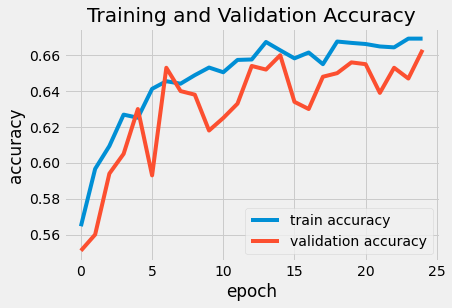

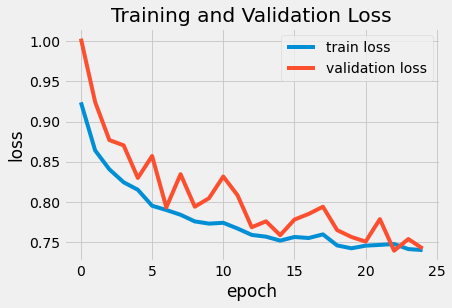

In [18]:
plt.plot(his1.history['accuracy'])
plt.plot(his1.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()


plt.plot(his1.history['loss'])
plt.plot(his1.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()

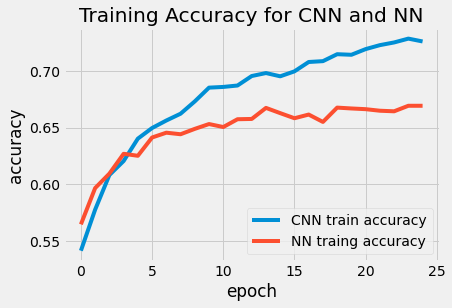

In [19]:
plt.plot(his.history['accuracy'])
plt.plot(his1.history['accuracy'])
plt.title('Training Accuracy for CNN and NN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN train accuracy', 'NN traing accuracy'], loc='lower right')
plt.show()